<a href="https://colab.research.google.com/github/rauhalai/freeCodeCamp/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
# Unzip to current folder
!unzip cats_and_dogs.zip
# Default path variable
PATH = 'cats_and_dogs'
# Paths to images
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [27]:
# 3

# Normalize and form data genereators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Create flow generator for train, validation and test
train_data_gen = train_image_generator.flow_from_directory(
        directory=train_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='binary',
        shuffle=True)


val_data_gen = validation_image_generator.flow_from_directory(
        directory=validation_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='binary',
        shuffle=True)

test_data_gen = test_image_generator.flow_from_directory(
        directory=PATH,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=50,
        color_mode="rgb",
        classes=['test'],
        shuffle=False)

Found 50 images belonging to 1 classes.


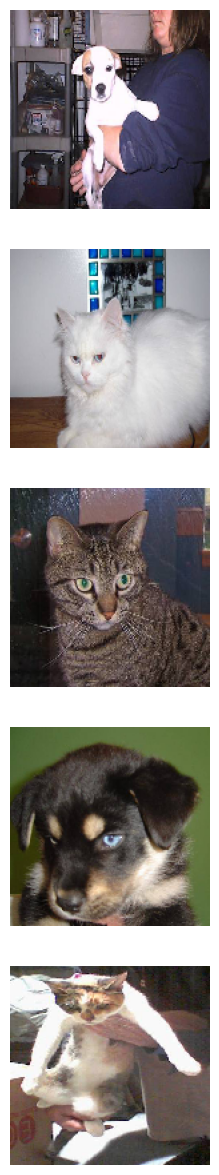

In [4]:
# 4
# Function to plot (visualize) Images
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
# 5
# Create more sample data by taking train images in in different formats
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.3,
                                           zoom_range=0.4,
                                           rotation_range=60,
                                           horizontal_flip=True,
                                           vertical_flip=True,
                                           validation_split = .3)


Found 2000 images belonging to 2 classes.


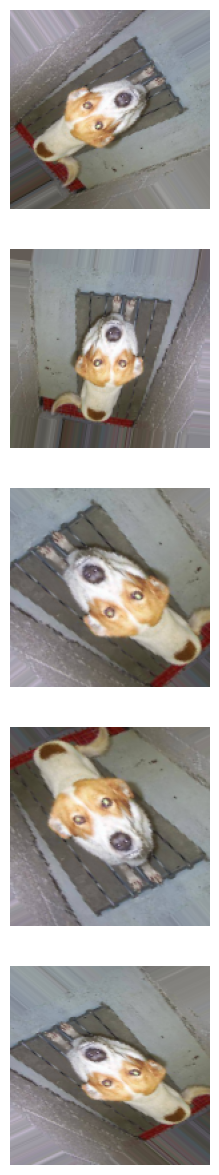

In [6]:
# 6
# Check results of new samples from same images
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [7]:
# 7
# Configuring model, adding layers
model = Sequential() # Sequential type
# Add multiple convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Flatten to 1D vector for fully connected layers
model.add(Flatten())
# Fully connected layers, last one with two neurons only
model.add(Dense(64, activation='relu'))
model.add(Dense(2))
# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Display summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
# 8
# Train the model with train images and validation images
history = model.fit(
    x=train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val/batch_size
)

Epoch 1/15
15/15 [==============================] - 32s 1s/step - loss: 0.8143 - accuracy: 0.4973 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.6931 - accuracy: 0.5123 - val_loss: 0.6920 - val_accuracy: 0.4990
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.6927 - accuracy: 0.5182 - val_loss: 0.6922 - val_accuracy: 0.5390
Epoch 4/15
15/15 [==============================] - 19s 1s/step - loss: 0.6906 - accuracy: 0.5625 - val_loss: 0.6857 - val_accuracy: 0.5270
Epoch 5/15
15/15 [==============================] - 18s 1s/step - loss: 0.6874 - accuracy: 0.5534 - val_loss: 0.6904 - val_accuracy: 0.5520
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.6719 - accuracy: 0.5865 - val_loss: 0.6574 - val_accuracy: 0.6160
Epoch 7/15
15/15 [==============================] - 18s 1s/step - loss: 0.6534 - accuracy: 0.6255 - val_loss: 0.6721 - val_accuracy: 0.6030
Epoch 8/15
15/15 [==

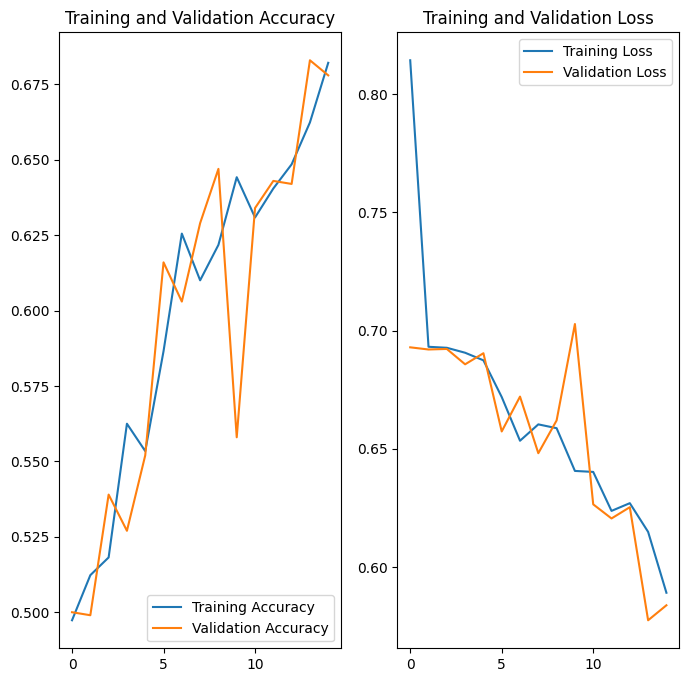

In [9]:
# 9
# Accuracy visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 154ms/step


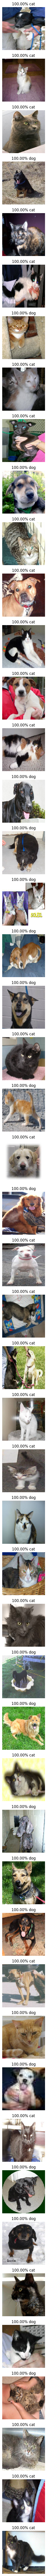

In [49]:
# 10
# Predict the test images

# Take test image patch
test_images, _ = next(test_data_gen)

# Get probabilities by taking max value from images probabilities
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)

# Draw images with predictions
plotImages(test_images, probabilities=probabilities)


In [50]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
